# Feature Engeneering

In [399]:
RANDOM_SEED = 42

In [400]:
import pickle
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [401]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\MachineLearning\projeto1-ml-ames\data


In [402]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'
clean_data_path

WindowsPath('c:/Users/rodri/Documents/Rodrigo/Insper/SextoSemestre/MachineLearning/projeto1-ml-ames/data/processed/ames_clean.pkl')

In [403]:
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [404]:
model_data = data.copy()
model_data.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Lot.Shape,Land.Contour,Lot.Config,Land.Slope,Neighborhood,Bldg.Type,...,Sale.Type,Sale.Condition,SalePrice,Condition,HasShed,HasAlley,Exterior,Garage.Age,Remod.Age,House.Age
0,20,RL,141.0,31770.0,IR1,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.332438,Norm,False,False,BrkFace,50.0,50.0,50.0
1,20,RH,80.0,11622.0,Reg,Lvl,Inside,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.021189,Roads,False,False,VinylSd,49.0,49.0,49.0
2,20,RL,81.0,14267.0,IR1,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.235528,Norm,False,False,Wd Sdng,52.0,52.0,52.0
3,20,RL,93.0,11160.0,Reg,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.387390,Norm,False,False,BrkFace,42.0,42.0,42.0
4,60,RL,74.0,13830.0,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,...,GroupedWD,Normal,5.278525,Norm,False,False,VinylSd,13.0,12.0,13.0


## Plotando informações

1.776950298044768e-05 5.051758856699882


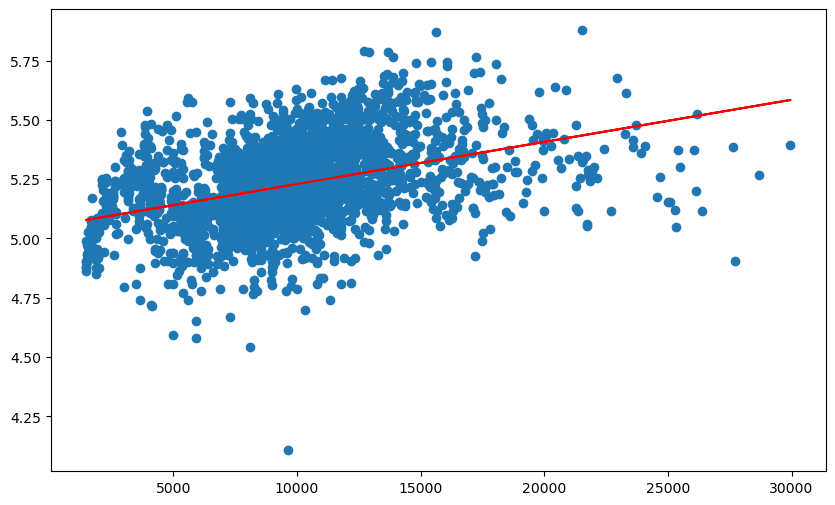

In [405]:
test = data[data['Lot.Area'] <= 30000]
# test = data[data['Lot.Area'] <= 3300000]
# sns.scatterplot(x='Lot.Area', y='SalePrice', data=test)
# sns.regplot(x='Lot.Area', y='SalePrice', data=test, scatter=False)
plt.figure(figsize=(10, 6))
plt.scatter(x='Lot.Area', y='SalePrice', data=test)
m , b = np.polyfit(test['Lot.Area'], test['SalePrice'], 1)
plt.plot(test['Lot.Area'], m*test['Lot.Area'] + b, color='red');

print(m, b)

0.0003413653035788616 5.221777569810228


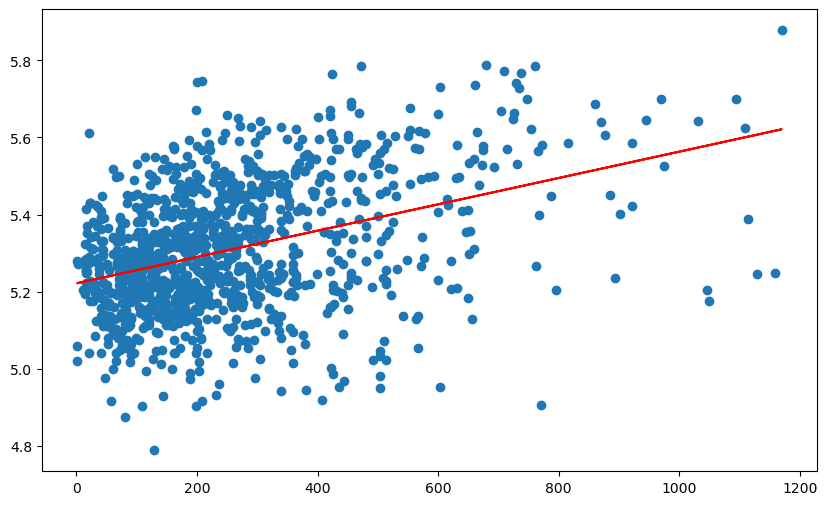

In [406]:
test = data[data['Mas.Vnr.Area'] <= 1200]
test = test[test['Mas.Vnr.Area'] > 0]
# test = data[data['Mas.Vnr.Area'] <= 1000000]
# sns.scatterplot(x='Mas.Vnr.Area', y='SalePrice', data=test)
# sns.regplot(x='Mas.Vnr.Area', y='SalePrice', data=test, scatter=False)
plt.figure(figsize=(10, 6))
plt.scatter(x='Mas.Vnr.Area', y='SalePrice', data=test)
m, b = np.polyfit(test['Mas.Vnr.Area'], test['SalePrice'], 1)
plt.plot(test['Mas.Vnr.Area'], m*test['Mas.Vnr.Area'] + b, color='red');

print (m, b)

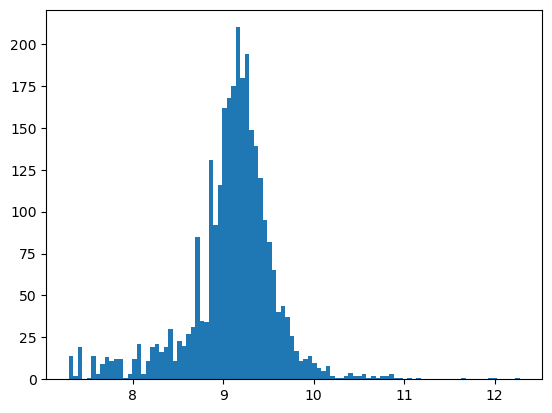

In [407]:
plt.hist(np.log(data['Lot.Area']), bins=100);

In [408]:
data['Lot.Area'] = np.log(data['Lot.Area'])

In [409]:
data["Mas.Vnr.Area"]

0       112.0
1         0.0
2       108.0
3         0.0
4         0.0
        ...  
2925      0.0
2926      0.0
2927      0.0
2928      0.0
2929     94.0
Name: Mas.Vnr.Area, Length: 2877, dtype: float64

In [410]:
log_mas = np.log(data['Mas.Vnr.Area'])

c:\Users\rodri\anaconda3\envs\mirror\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [411]:
data['Mas.Vnr.Area'] = log_mas
# remove outliers
data = data[data['Mas.Vnr.Area'] > 0]


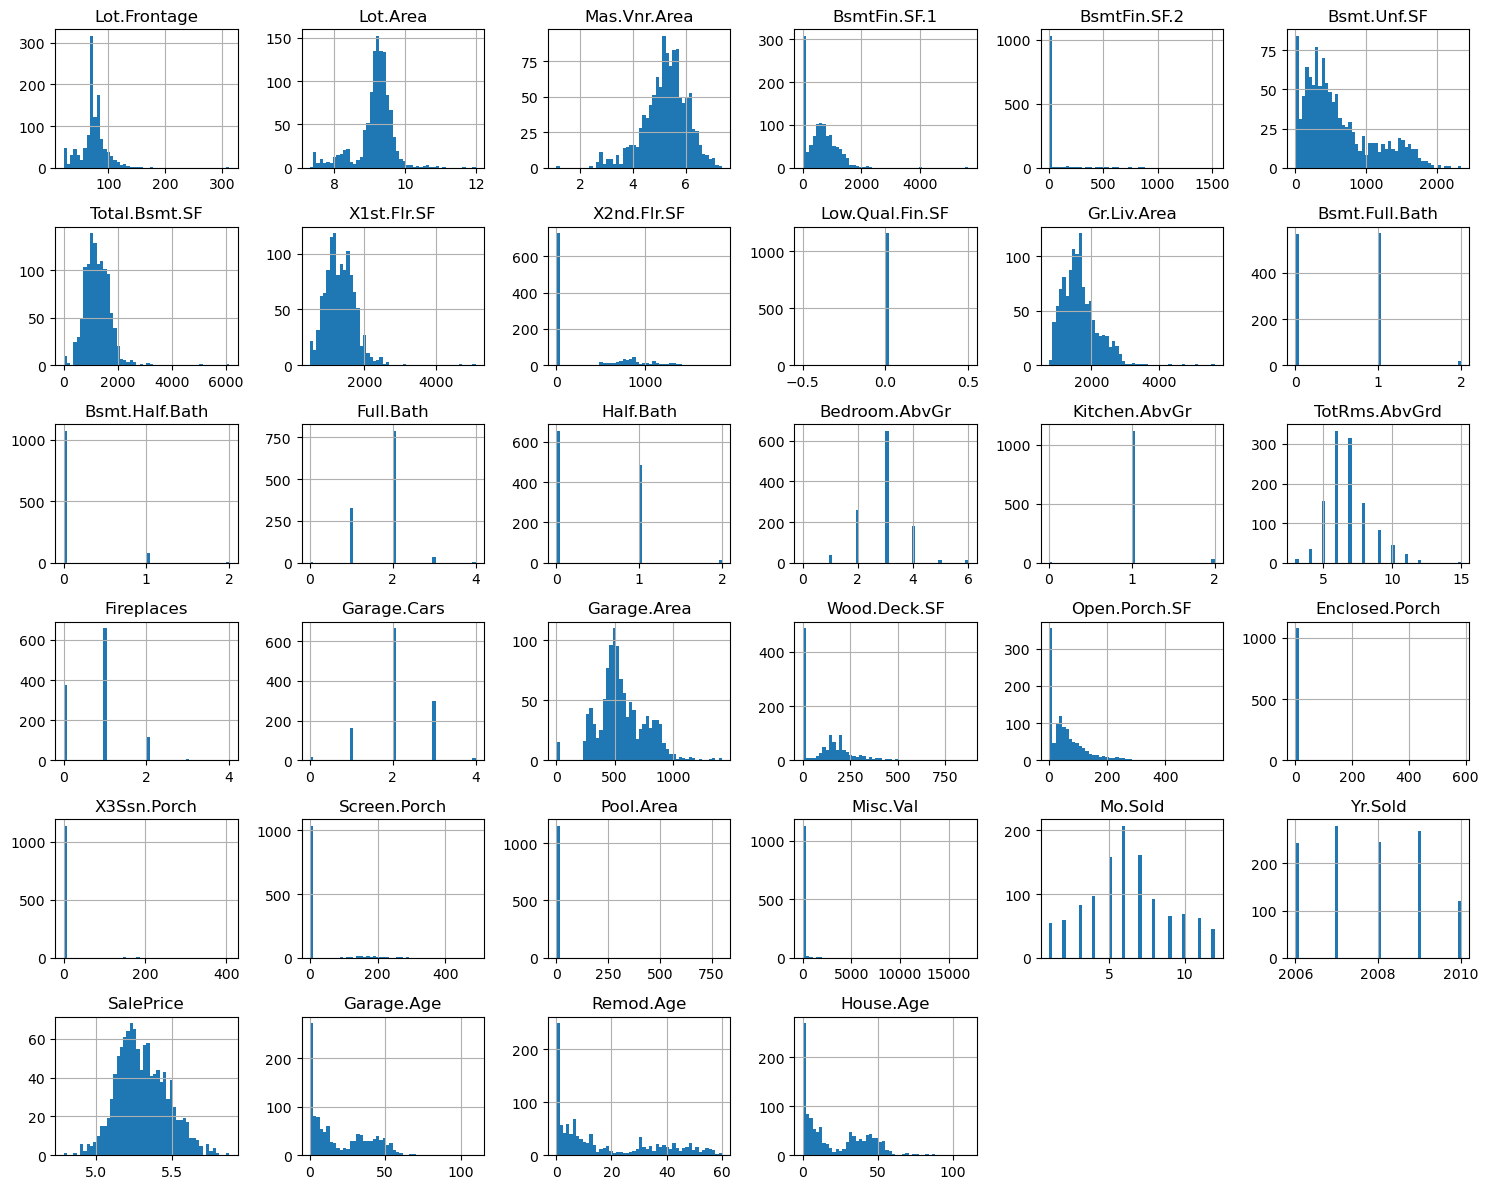

In [412]:
data.hist(figsize=(15,12), bins=50);
plt.tight_layout()
plt.show()

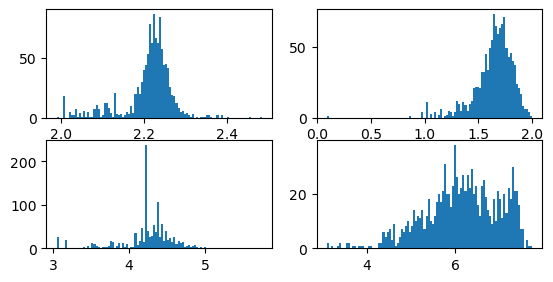

In [413]:
# Transformando para Log e Tratando os Infinitos
log_mas = np.log(data['Mas.Vnr.Area'])
log_mas.replace([np.inf, -np.inf], np.nan, inplace=True)

log_lot = np.log(data['Lot.Area'])
log_lot.replace([np.inf, -np.inf], np.nan, inplace=True)

log_lot_front = np.log(data['Lot.Frontage'])
log_lot_front.replace([np.inf, -np.inf], np.nan, inplace=True)

log_bsmt = np.log(data['Bsmt.Unf.SF'])
log_bsmt.replace([np.inf, -np.inf], np.nan, inplace=True)

log_house_age = np.log(data['House.Age'])
log_house_age.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.subplot(3, 2, 1)
plt.hist(log_lot, bins=100);
plt.subplot(3, 2, 2)
plt.hist(log_mas, bins=100);
plt.subplot(3, 2, 3)
plt.hist(log_lot_front, bins=100);
plt.subplot(3, 2, 4)
plt.hist(log_bsmt, bins=100);

In [414]:
# pool area value count
data['Pool.Area'].value_counts()




0.0      1150
144.0       1
480.0       1
519.0       1
648.0       1
800.0       1
Name: Pool.Area, dtype: int64

In [415]:
data['Screen.Porch'].value_counts()

0.0      1035
144.0       7
168.0       7
192.0       6
155.0       4
         ... 
273.0       1
130.0       1
163.0       1
287.0       1
90.0        1
Name: Screen.Porch, Length: 78, dtype: int64

In [416]:
# pool area value count
data['X3Ssn.Porch'].value_counts()

0.0      1136
153.0       3
168.0       2
216.0       2
180.0       2
144.0       1
255.0       1
225.0       1
162.0       1
182.0       1
174.0       1
304.0       1
407.0       1
245.0       1
196.0       1
Name: X3Ssn.Porch, dtype: int64

In [417]:
# TRANSFORM pool area in two categories
data['Pool.Area'] = data['Pool.Area'].apply(lambda x: 1 if x > 0 else 0)
data['Pool.Area'].value_counts()


0    1150
1       5
Name: Pool.Area, dtype: int64

In [418]:
# TRANSFORM screen porch in two categories
data['Screen.Porch'] = data['Screen.Porch'].apply(lambda x: 1 if x > 0 else 0)
data['Screen.Porch'].value_counts()

0    1035
1     120
Name: Screen.Porch, dtype: int64

In [419]:
# TRANSFORM 3 season porch in two categories
data['X3Ssn.Porch'] = data['X3Ssn.Porch'].apply(lambda x: 1 if x > 0 else 0)
data['X3Ssn.Porch'].value_counts()

0    1136
1      19
Name: X3Ssn.Porch, dtype: int64

In [420]:

data['Enclosed.Porch'].value_counts()

0.0      1078
192.0       4
144.0       4
216.0       4
35.0        2
154.0       2
252.0       2
240.0       2
168.0       2
36.0        2
84.0        2
186.0       2
150.0       2
32.0        1
88.0        1
138.0       1
90.0        1
207.0       1
246.0       1
99.0        1
249.0       1
294.0       1
275.0       1
39.0        1
324.0       1
224.0       1
264.0       1
296.0       1
19.0        1
70.0        1
584.0       1
37.0        1
140.0       1
40.0        1
280.0       1
180.0       1
176.0       1
123.0       1
156.0       1
164.0       1
189.0       1
120.0       1
113.0       1
86.0        1
202.0       1
209.0       1
228.0       1
248.0       1
203.0       1
100.0       1
64.0        1
98.0        1
102.0       1
177.0       1
55.0        1
368.0       1
218.0       1
165.0       1
16.0        1
116.0       1
Name: Enclosed.Porch, dtype: int64

In [421]:
# TRANSFORM Enclosed Porch in two categories
data['Enclosed.Porch'] = data['Enclosed.Porch'].apply(lambda x: 1 if x > 0 else 0)
data['Enclosed.Porch'].value_counts()

0    1078
1      77
Name: Enclosed.Porch, dtype: int64

In [422]:
data['Misc.Val'].value_counts()
# TRANSFORM Misc Val in two categories
data['Misc.Val'] = data['Misc.Val'].apply(lambda x: 1 if x > 0 else 0)
data['Misc.Val'].value_counts()

0    1125
1      30
Name: Misc.Val, dtype: int64

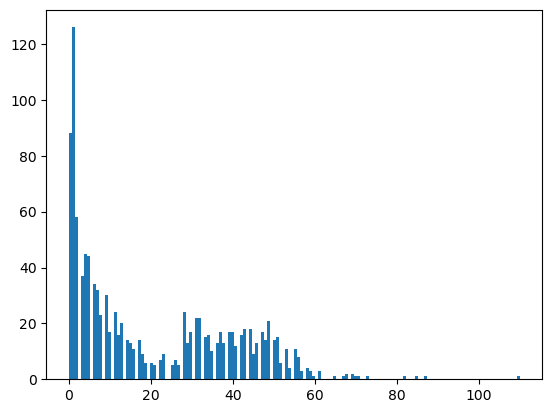

In [423]:
plt.hist(data['Garage.Age'], bins=150);

In [424]:
data['Garage.Age'].value_counts()

1.0     126
0.0      88
2.0      58
4.0      45
5.0      44
       ... 
87.0      1
73.0      1
65.0      1
67.0      1
82.0      1
Name: Garage.Age, Length: 72, dtype: int64

In [425]:
data['Bsmt.Unf.SF'].value_counts()


0.0       71
162.0      6
348.0      6
316.0      6
384.0      6
          ..
1053.0     1
1128.0     1
1341.0     1
1417.0     1
238.0      1
Name: Bsmt.Unf.SF, Length: 730, dtype: int64

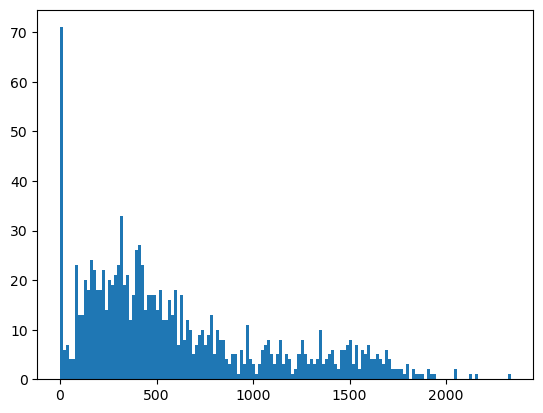

In [426]:
plt.hist(data['Bsmt.Unf.SF'], bins=150);


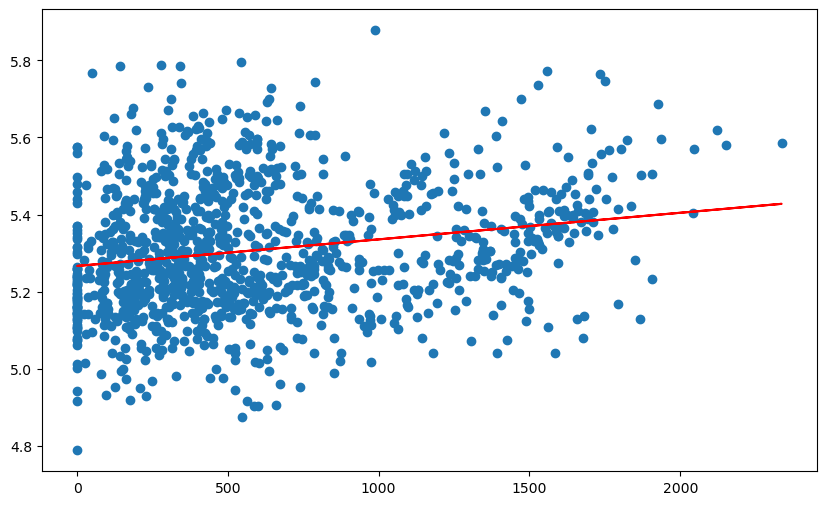

In [427]:
# Plot BSMNT UNF SF with SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(x='Bsmt.Unf.SF', y='SalePrice', data=data)
m, b = np.polyfit(data['Bsmt.Unf.SF'], data['SalePrice'], 1)
plt.plot(data['Bsmt.Unf.SF'], m*data['Bsmt.Unf.SF'] + b, color='red');


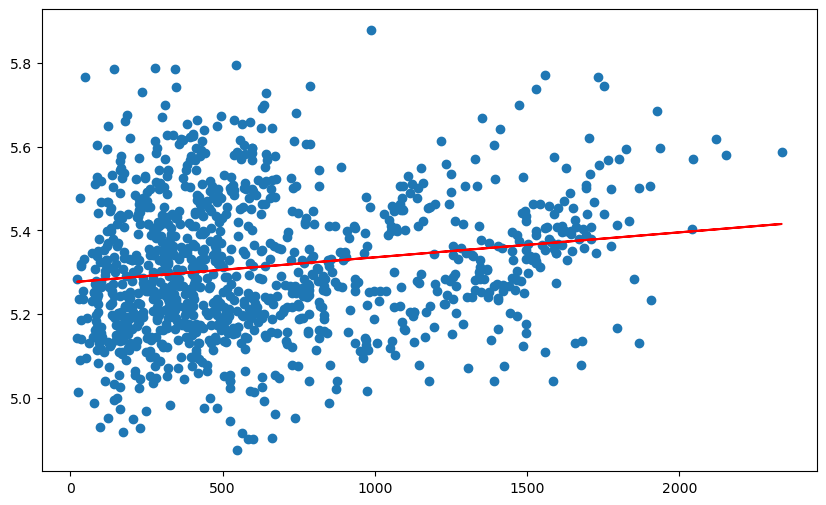

In [431]:
# removing the zeros
test = data[data['Bsmt.Unf.SF'] > 0]
plt.figure(figsize=(10, 6))
plt.scatter(x='Bsmt.Unf.SF', y='SalePrice', data=test)
m, b = np.polyfit(test['Bsmt.Unf.SF'], test['SalePrice'], 1)
plt.plot(test['Bsmt.Unf.SF'], m*test['Bsmt.Unf.SF'] + b, color='red');


In [429]:
# look for NaNs IN ALL COLUMNS
data.isna().sum().sum()


71

In [430]:
clean_data_path = DATA_DIR / 'processed' / 'ames_eng.pkl'
with open(clean_data_path, 'wb') as file:
    pickle.dump(data, file)
